Habilita a google drive para contener los datos que usará google colab. La información está en:
1. original_dir contiene el path de la carpeta que contiene la BD completa de Kaggle con imágenes de perros y gatos
2. new_base_dir almacena el path de la BD reducida con la que se entrenará en este ejemplo. Dentro debe tener tres carpetas: train, test y validation y dentro de cada una, dos carpetas: Dog y Cat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
original_dir=r"/content/drive/MyDrive/PetImages"
new_base_dir=r"/content/drive/MyDrive/PetImages/cats_vs_dogs_small"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este código crea a partir de la BD de kaggle un repositorio reducido (perros y gatos). De las 25,000 imágenes sólo se usarán 5,000

In [ ]:
"""
import os, shutil
def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        dir = new_base_dir+"/"+subset_name+"/"+category
        fnames = [f"{original_dir}/{category}/{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            print(fname)
            print(dir)
            shutil.copy(fname,dir)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)
"""

'\nimport os, shutil\ndef make_subset(subset_name, start_index, end_index):\n    for category in ("Cat", "Dog"):\n        dir = new_base_dir+"/"+subset_name+"/"+category\n        fnames = [f"{original_dir}/{category}/{i}.jpg" for i in range(start_index, end_index)]\n        for fname in fnames:\n            print(fname)\n            print(dir)\n            shutil.copy(fname,dir)\n\nmake_subset("train", start_index=0, end_index=1000)\nmake_subset("validation", start_index=1000, end_index=1500)\nmake_subset("test", start_index=1500, end_index=2500)\n'

Definición de la red neuronal convolucional (5 capas) para imagénes de 180x180 píxeles

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Hiperparámetros para el entrenamiento y medición de desempeño

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Convierte la información de la imagen de píxeles en un tensor numérico de punto flotante y ajusta el tamaño de la imagen porque todas tienen diferente resolución

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

Visualizar el tensor asociado a los datos y las etiquetas

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fase de entrenamiento 

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 224s 3s/step - loss: 0.7319 - accuracy: 0.4950 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 7s 108ms/step - loss: 0.6981 - accuracy: 0.5450 - val_loss: 0.6650 - val_accuracy: 0.5930
Epoch 3/10
63/63 [==============================] - 7s 108ms/step - loss: 0.6801 - accuracy: 0.5920 - val_loss: 0.6729 - val_accuracy: 0.5970
Epoch 4/10
63/63 [==============================] - 7s 107ms/step - loss: 0.6425 - accuracy: 0.6615 - val_loss: 0.6406 - val_accuracy: 0.6470
Epoch 5/10
63/63 [==============================] - 7s 109ms/step - loss: 0.5986 - accuracy: 0.6865 - val_loss: 0.6458 - val_accuracy: 0.6230
Epoch 6/10
63/63 [==============================] - 8s 118ms/step - loss: 0.5552 - accuracy: 0.7285 - val_loss: 0.6755 - val_accuracy: 0.6690
Epoch 7/10
63/63 [==============================] - 7s 109ms/step - loss: 0.4966 - accuracy: 0.7540 - val_loss: 0.7021 - val_accuracy: 0.6540
Epoch 8

Visualización de la pérdidad y el accuracy tanto para los datos de entrenamiento como para los datos de validación y así detectar si hay overfitting

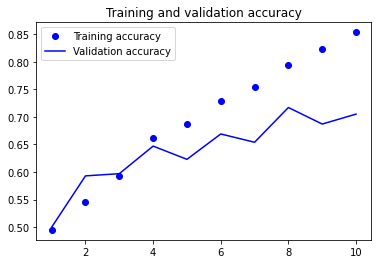

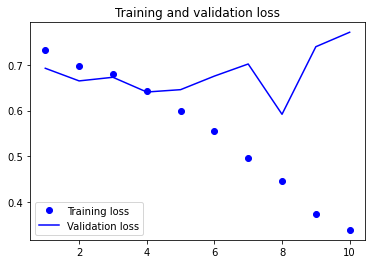

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Ejercicio:
----------
1. Utilizar regularización y/o dropout para intentar disminuir o eliminar el overfitting ¿Qué observa?
2. Probar con menos epocas y lotes (batch_size) más grandes ¿Qué observa?
3. Dismunuya el tamaño de la red para intentar eliminar el overfitting ¿Qué observa?
4. ¿Cuál le pareció que daba mejores resultados?